In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

# Handling Missing Values


In [2]:
data = {
    'Age': [25, 30, 45, 40, 55, 50],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F'],
    'Occupation': ['Engineer', 'Doctor', 'Doctor', 'Engineer', 'Lawyer', 'Lawyer'],
    'Income': [50000, np.nan, 80000, np.nan, 120000, 100000]
}

df = pd.DataFrame(data)
print("Original Data:\n")
df

Original Data:



,Age,Gender,Occupation,Income
0,25,M,Engineer,50000.0
1,30,F,Doctor,NaN
2,45,M,Doctor,80000.0
3,40,F,Engineer,NaN
4,55,M,Lawyer,120000.0
5,50,F,Lawyer,100000.0


In [3]:
df['tincome'] = df.groupby('Occupation')['Income'].transform( lambda x : x.mean())
df

,Age,Gender,Occupation,Income,tincome
0,25,M,Engineer,50000.0,50000.0
1,30,F,Doctor,NaN,80000.0
2,45,M,Doctor,80000.0,80000.0
3,40,F,Engineer,NaN,50000.0
4,55,M,Lawyer,120000.0,110000.0
5,50,F,Lawyer,100000.0,110000.0


In [4]:
data = np.array([10, 12, 13, 14, 15, 16, 18, 50, 52, 550])
df = pd.DataFrame({'value': data})
df

,value
0,10
1,12
2,13
3,14
4,15
5,16
6,18
7,50
8,52
9,550


In [5]:
q1 = np.percentile(df.value, 25)
q3 = np.percentile(df.value , 75)
iqr = q3 - q1
q1 , q3 , iqr

(13.25, 42.0, 28.75)

In [6]:
llimit = q1 - (1.5 * iqr)
ulimit = q3 + (1.5 * iqr)
llimit , ulimit

(-29.875, 85.125)

<Axes: ylabel='log'>

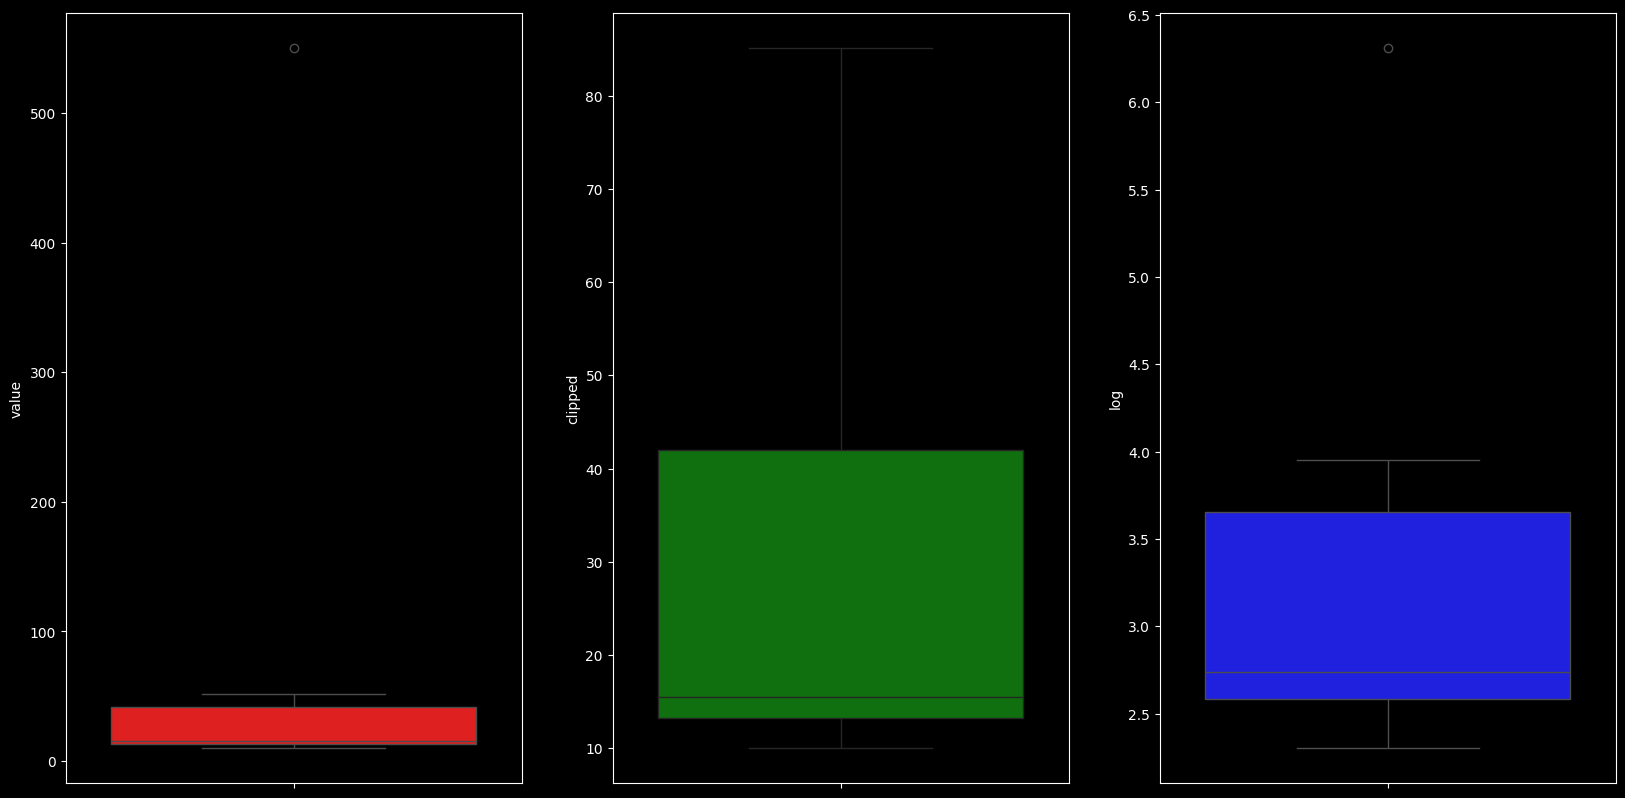

In [7]:
df['clipped'] = df.value.clip(lower = llimit , upper = ulimit)
df['log'] = np.log(df.value)

plt.figure(figsize = (20,10))

plt.subplot(1 , 3, 1)
sns.boxplot(df , y = 'value' , color = 'red')

plt.subplot(1 , 3, 2)
sns.boxplot(df , y = 'clipped' , color = 'green')

plt.subplot(1 ,3, 3)
sns.boxplot(df , y = 'log' , color = 'blue')

In [8]:
df.clipped , np.clip(df.value , llimit , ulimit)

(0    10.000
 1    12.000
 2    13.000
 3    14.000
 4    15.000
 5    16.000
 6    18.000
 7    50.000
 8    52.000
 9    85.125
 Name: clipped, dtype: float64,
 0    10.000
 1    12.000
 2    13.000
 3    14.000
 4    15.000
 5    16.000
 6    18.000
 7    50.000
 8    52.000
 9    85.125
 Name: value, dtype: float64)

# Normalization:


In [9]:
data = pd.DataFrame({
    'salary': [30000, 45000, 55000, 60000, 75000, 120000]
})
print("Original Data:\n", data)

Original Data:
    salary
0   30000
1   45000
2   55000
3   60000
4   75000
5  120000


In [10]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler

sscaler = StandardScaler()
mscaler = MinMaxScaler()

data['standard'] = sscaler.fit_transform(data[['salary']])
data['min-max'] = mscaler.fit_transform(data[['salary']])
data

,salary,standard,min-max
0,30000,-1.199159,0.000000
1,45000,-0.672699,0.166667
2,55000,-0.321725,0.277778
3,60000,-0.146239,0.333333
4,75000,0.380221,0.500000
5,120000,1.959601,1.000000


In [11]:
data[['salary']].shape , data['salary'].shape

((6, 1), (6,))

# Encoding:


### Label Encoder:


In [14]:
data = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Asia', 'Australia', 'Europe', 'Asia']
})


print("Original Data:\n", data)

Original Data:
           Region
0  North America
1         Europe
2           Asia
3      Australia
4         Europe
5           Asia


In [16]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit_transform(data.Region)

array([3, 2, 0, 1, 2, 0])

### Ordinal Encoder:


In [17]:
data = pd.DataFrame({
    'Education_Level': ['High School', 'Bachelor', 'Master', 'PhD', 'Bachelor', 'Master']
})
# Define the explicit order of categories
education_order = ['High School', 'Bachelor', 'Master', 'PhD']

print("Original Data:\n", data)


Original Data:
   Education_Level
0     High School
1        Bachelor
2          Master
3             PhD
4        Bachelor
5          Master


In [23]:
from sklearn.preprocessing import OrdinalEncoder

oencoder = OrdinalEncoder(categories = [education_order])
oencoder.fit_transform(data[['Education_Level']])

array([[0.],
       [1.],
       [2.],
       [3.],
       [1.],
       [2.]])

# Linear Regression


# Logistic Regression:


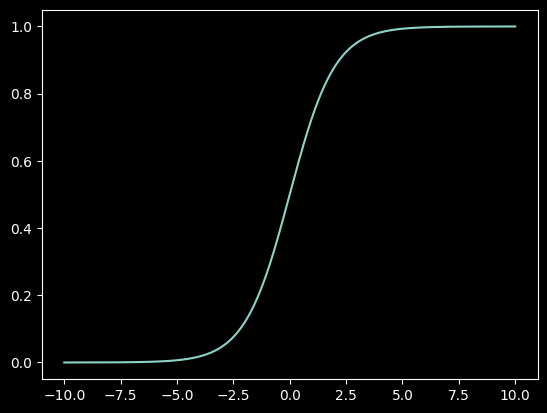

In [12]:
x = np.linspace(-10 , 10 , 1000)
y = 1 / (1 + np.exp(-x))
plt.plot(x , y)